In [18]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [40]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder 

from sklearn import metrics 
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split


In [198]:
train_df=pd.read_excel('./data/Train/train_Data.xlsx')
test_df=pd.read_excel('./data/Test_data/test_Data.xlsx')

In [170]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               128655 non-null  int64         
 1   Frequency        128655 non-null  object        
 2   InstlmentMode    128655 non-null  object        
 3   LoanStatus       128655 non-null  object        
 4   PaymentMode      128655 non-null  object        
 5   BranchID         128655 non-null  int64         
 6   Area             117002 non-null  object        
 7   Tenure           128655 non-null  int64         
 8   AssetCost        128655 non-null  int64         
 9   AmountFinance    128655 non-null  float64       
 10  DisbursalAmount  128655 non-null  float64       
 11  EMI              128655 non-null  float64       
 12  DisbursalDate    128655 non-null  datetime64[ns]
 13  MaturityDAte     128654 non-null  datetime64[ns]
 14  AuthDate         128

In [370]:
train_df=train_df_copy.copy()
test_df=test_df_copy.copy()

In [288]:
# train_df.isnull().sum()
test_df.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Area               546
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         0
AuthDate             0
AssetID              0
ManufacturerID       2
SupplierID           0
LTV                  0
SEX                  5
AGE                  7
MonthlyIncome       14
City                 0
State                0
ZiPCODE              1
dtype: int64

In [289]:
# train_df.nunique()
test_df.nunique()

ID                 14745
Frequency              3
InstlmentMode          2
LoanStatus             2
PaymentMode           10
BranchID             182
Area                  80
Tenure                98
AssetCost           1162
AmountFinance       4066
DisbursalAmount     3978
EMI                 4370
DisbursalDate       2034
MaturityDAte         371
AuthDate            1990
AssetID            14745
ManufacturerID        12
SupplierID          1573
LTV                 5101
SEX                    2
AGE                   65
MonthlyIncome       2470
City                 321
State                 18
ZiPCODE             2182
dtype: int64

In [290]:
train_df.describe()

,ID,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,AssetID,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE
count,128655.000000,128655.000000,128655.000000,1.286550e+05,1.286550e+05,1.286550e+05,128655.000000,1.286550e+05,128655.000000,128655.000000,128655.000000,128596.000000,1.284210e+05,128283.000000
mean,70965.326556,166.289674,42.464778,5.550247e+05,3.483096e+05,3.479306e+05,55072.758506,1.639773e+07,1171.327271,56551.226210,59.126226,40.664803,5.032360e+04,427931.099725
std,41762.779285,115.844048,23.533972,1.083036e+05,1.055453e+05,1.053198e+05,28910.111740,9.539540e+06,257.790208,36399.355276,15.539038,11.712847,1.724607e+06,175704.364031
min,1.000000,1.000000,5.000000,2.000000e+05,5.000000e+04,2.894000e+03,0.000000,4.222710e+05,1019.000000,5879.000000,-1.380000,18.000000,0.000000e+00,110000.000000
25%,34408.500000,50.000000,36.000000,5.000000e+05,2.900000e+05,2.900000e+05,32500.000000,9.438948e+06,1046.000000,24093.000000,49.140000,31.000000,2.500000e+04,304804.000000
50%,70988.000000,152.000000,36.000000,5.507350e+05,3.500000e+05,3.500000e+05,59700.000000,1.513393e+07,1062.000000,39146.000000,60.780000,40.000000,3.583333e+04,458553.000000
75%,106549.500000,274.000000,48.000000,6.110000e+05,4.100000e+05,4.100000e+05,73800.000000,2.533396e+07,1186.000000,87034.000000,70.590000,49.000000,5.000000e+04,521131.000000
max,143395.000000,424.000000,501.000000,2.250000e+06,1.308351e+06,1.308351e+06,460000.000000,3.706667e+07,3473.000000,145518.000000,100.000000,90.000000,6.174775e+08,855456.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B0A2AB7F0>,
      dtype=object)

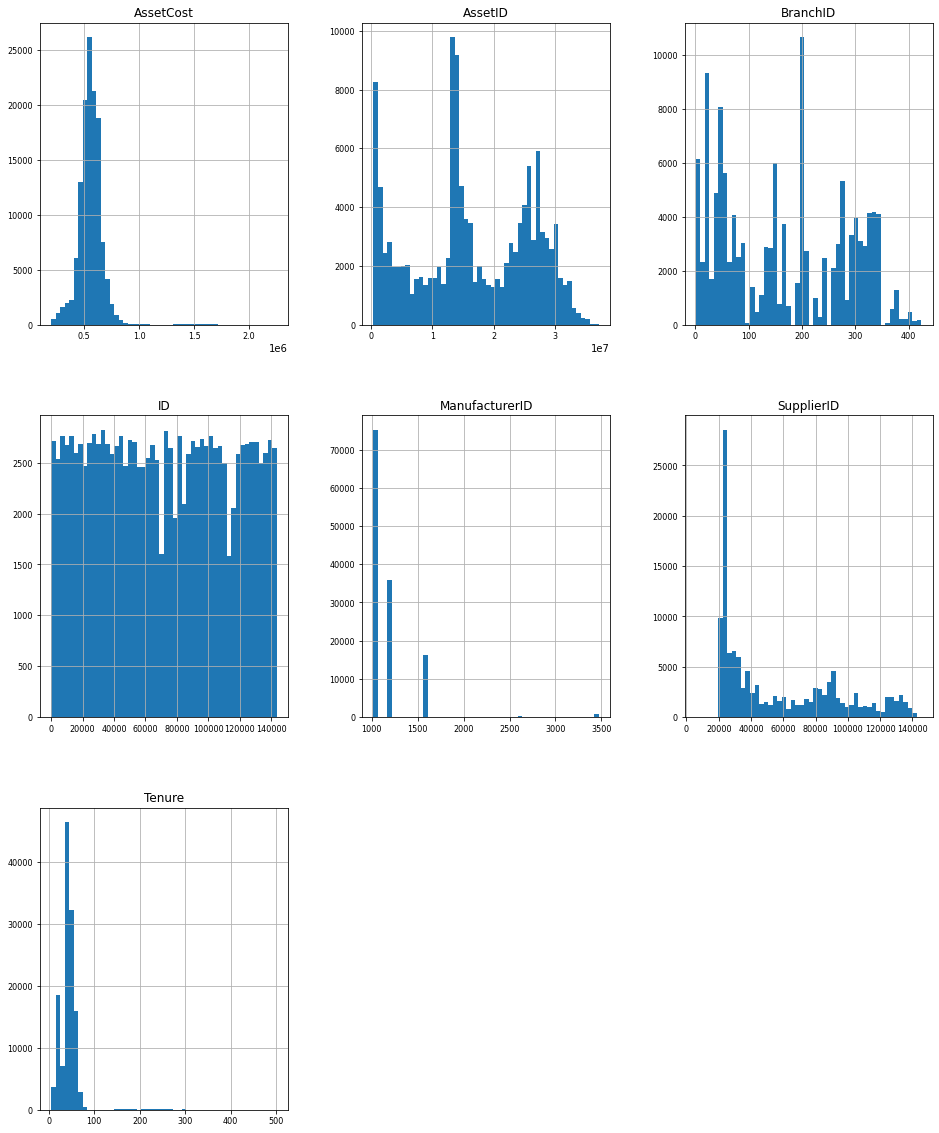

In [291]:
df_num = train_df.select_dtypes(include = ['int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

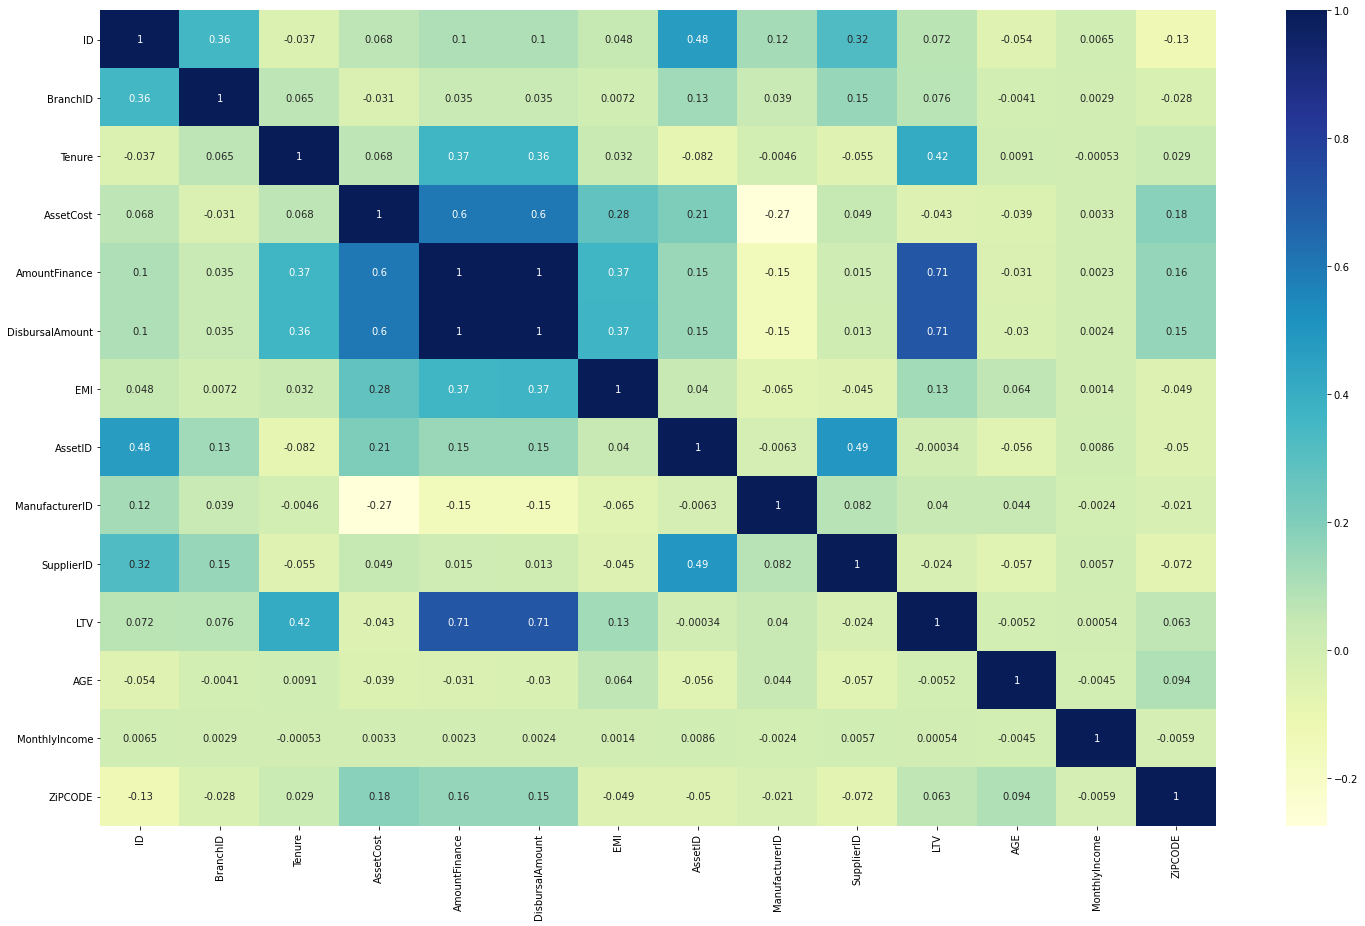

In [292]:
plt.figure(figsize=(25,15)) 
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")

In [293]:
for col in train_df.columns:
    if train_df[col].dtypes=='object':
        print([col])

['Frequency']
['InstlmentMode']
['LoanStatus']
['PaymentMode']
['Area']
['SEX']
['City']
['State']
['Top-up Month']


#### Removing Nan values and Label Encoding 

In [294]:
LE = LabelEncoder()

In [295]:
print('SEX Unique Values()',train_df['SEX'].unique(),'\n','AGE Unique Values',train_df['AGE'].unique())
train_df['SEX']=train_df['SEX'].fillna(train_df['SEX'].mode()[0])
train_df['AGE']=train_df['AGE'].fillna(train_df['AGE'].mean())
train_df['AGE'] = train_df['AGE'].astype(int)
print('SEX Unique Values()',train_df['SEX'].unique(),'\n','AGE Unique Values',train_df['AGE'].unique())


SEX Unique Values() ['M' nan 'F'] 
 AGE Unique Values [49. 23. 39. 24. 56. 40. 41. 51. 33. 34. 20. 52. 45. 58. 57. 27. nan 29.
 35. 26. 43. 37. 44. 21. 36. 28. 30. 54. 19. 32. 50. 53. 31. 47. 38. 55.
 46. 60. 48. 42. 59. 25. 22. 63. 81. 75. 62. 61. 67. 18. 68. 66. 65. 70.
 73. 69. 64. 71. 77. 72. 74. 82. 79. 80. 76. 78. 84. 85. 86. 83. 89. 87.
 88. 90.]
SEX Unique Values() ['M' 'F'] 
 AGE Unique Values [49 23 39 24 56 40 41 51 33 34 20 52 45 58 57 27 29 35 26 43 37 44 21 36
 28 30 54 19 32 50 53 31 47 38 55 46 60 48 42 59 25 22 63 81 75 62 61 67
 18 68 66 65 70 73 69 64 71 77 72 74 82 79 80 76 78 84 85 86 83 89 87 88
 90]


In [296]:
train_df.SEX=train_df.SEX.map({'M':1,'F':0}).astype(np.int)
train_df['Frequency'] = train_df['Frequency'].map({'Monthly':0, 'Quatrly':1, 'Half Yearly':2, 'BI-Monthly':3})
train_df.InstlmentMode=train_df.InstlmentMode.map({'Advance':1,'Arrear':0}).astype(np.int)
train_df.LoanStatus=train_df.LoanStatus.map({'Closed':1,'Active':0}).astype(np.int)

In [297]:
# print(train_df['SEX'].describe())
# plt.figure(figsize=(9, 8))
# sns.distplot(train_df['SEX'], color='g', hist_kws={'alpha': 0.4});

In [298]:
# train_df.drop(['SEX'],axis=1,inplace=True)

In [299]:
train_df.drop(['Area','City'],axis=1,inplace=True)


In [300]:
train_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,...,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,State,ZiPCODE,Top-up Month
0,1,0,0,1,PDC_E,1,48,450000,275000.0,275000.0,...,4022465,1568,21946,61.11,1,49,35833.33,MADHYA PRADESH,464993.0,> 48 Months
1,2,0,1,1,PDC,333,47,485000,350000.0,350000.0,...,4681175,1062,34802,70.00,1,23,666.67,MADHYA PRADESH,466001.0,No Top-up Service
2,3,1,0,0,Direct Debit,1,68,690000,519728.0,519728.0,...,25328146,1060,127335,69.77,1,39,45257.00,MADHYA PRADESH,462030.0,12-18 Months
3,7,0,1,1,Billed,125,48,480000,400000.0,400000.0,...,13021591,1060,25094,80.92,1,24,20833.33,MADHYA PRADESH,473335.0,> 48 Months
4,8,0,0,1,Billed,152,44,619265,440000.0,440000.0,...,3291320,1046,21853,71.05,1,56,27313.67,CHATTISGARH,495442.0,36-48 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128650,143390,2,0,1,Direct Debit,424,24,470000,265601.0,265601.0,...,31286914,1568,48879,40.17,1,25,65333.33,HARYANA,131403.0,24-30 Months
128651,143391,2,0,1,Direct Debit,424,24,460000,275630.0,275630.0,...,31295422,1568,48879,59.92,1,25,83333.33,HARYANA,131403.0,No Top-up Service
128652,143393,0,0,0,Direct Debit,424,23,545000,300733.0,300733.0,...,32145629,1568,44118,52.38,1,36,248500.00,HARYANA,131024.0,No Top-up Service
128653,143394,2,0,0,Direct Debit,424,35,350000,250962.0,250962.0,...,32509866,1568,48879,50.37,1,37,84500.00,HARYANA,131103.0,No Top-up Service


In [301]:
train_df['ZiPCODE']=train_df.groupby('BranchID')['ZiPCODE'].transform(lambda x:x.fillna(x.mode()[0]))
train_df['ZiPCODE'] = train_df['ZiPCODE'].astype(str)
train_df['ZiPCODE'] = LE.fit_transform(train_df['ZiPCODE'])
train_df['State'] = LE.fit_transform(train_df['State'])

train_df['PaymentMode'] = LE.fit_transform(train_df['PaymentMode'])
train_df['MaturityDAte'].fillna(pd.to_datetime('2016-12-15'), inplace=True)

train_df['ManufacturerID'].fillna(0, inplace=True)
train_df['ManufacturerID'] = train_df['ManufacturerID'].astype(str)
train_df['ManufacturerID'] = LE.fit_transform(train_df['ManufacturerID'])
train_df['SupplierID'] = train_df['SupplierID'].astype(str)
train_df['SupplierID'] = LE.fit_transform(train_df['SupplierID'])

##### Branch_id Miss in train_df and Test are observed

In [302]:

train_df['BranchID']=LE.fit_transform((train_df['BranchID']))

In [303]:
train_df.dtypes
train_df['MonthlyIncome']=train_df['MonthlyIncome'].fillna(0)

In [304]:
train_df['MaturityDAte_day'] = train_df['MaturityDAte'].dt.day
train_df['MaturityDAte_month'] = train_df['MaturityDAte'].dt.month
train_df['MaturityDAte_year'] = train_df['MaturityDAte'].dt.year
train_df['AuthDate_day'] = train_df['AuthDate'].dt.day
train_df['AuthDate_month'] = train_df['AuthDate'].dt.month
train_df['AuthDate_year'] = train_df['AuthDate'].dt.year
train_df['DisbursalDate_day'] = train_df['DisbursalDate'].dt.day
train_df['DisbursalDate_month'] = train_df['DisbursalDate'].dt.month
train_df['DisbursalDate_year'] = train_df['DisbursalDate'].dt.year
train_df.drop(['MaturityDAte','AuthDate','DisbursalDate'], axis=1, inplace=True)

In [305]:
# train_df.drop(['Area','City','AssetID'],axis=1,inplace=True)
# train_df.head()

In [306]:
train_df.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                    0
AGE                    0
MonthlyIncome          0
State                  0
ZiPCODE                0
Top-up Month           0
MaturityDAte_day       0
MaturityDAte_month     0
MaturityDAte_year      0
AuthDate_day           0
AuthDate_month         0
AuthDate_year          0
DisbursalDate_day      0
DisbursalDate_month    0
DisbursalDate_year     0
dtype: int64

In [307]:
train_df.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount',
       'EMI', 'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'State', 'ZiPCODE', 'Top-up Month', 'MaturityDAte_day',
       'MaturityDAte_month', 'MaturityDAte_year', 'AuthDate_day',
       'AuthDate_month', 'AuthDate_year', 'DisbursalDate_day',
       'DisbursalDate_month', 'DisbursalDate_year'],
      dtype='object')

#### TARGET variable encoding
#### [' > 48 Months':0, '12-18 Months':1, '18-24 Months':2, '24-30 Months':3, '30-36 Months':4, '36-48 Months':5, 'No Top-up Service':6]

In [308]:
LE_target=LabelEncoder()

y=train_df['Top-up Month']
y=LE_target.fit_transform(y)
le_name_mapping = dict(zip(LE_target.classes_, LE_target.transform(LE_target.classes_)))
print(le_name_mapping)
y

{' > 48 Months': 0, '12-18 Months': 1, '18-24 Months': 2, '24-30 Months': 3, '30-36 Months': 4, '36-48 Months': 5, 'No Top-up Service': 6}


array([0, 6, 1, ..., 6, 6, 6])

In [309]:

X=train_df.drop(columns=['Top-up Month'])


### Handling Imbalanced Data 
#### SMOTE 

count                128655
unique                    7
top       No Top-up Service
freq                 106677
Name: Top-up Month, dtype: object


Default bandwidth for data is 0; skipping density estimation.


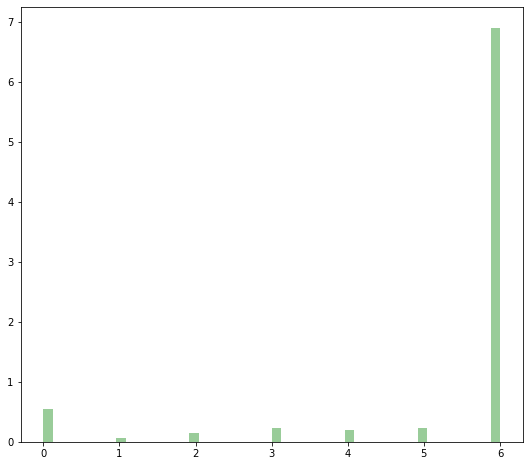

In [310]:
print(train_df['Top-up Month'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(LE.fit_transform(train_df['Top-up Month']), color='g', hist_kws={'alpha': 0.4});

In [311]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [312]:
smote=SMOTE()
X_balanced,y_balanced=smote.fit_resample(X,y)
X_train, X_test, y_train, y_test=train_test_split(X_balanced,y_balanced,test_size=0.25)


###### Standarization of Data

In [313]:
from sklearn.preprocessing import StandardScaler,RobustScaler

In [314]:
standard_scalar=RobustScaler()
X_train_scaled=standard_scalar.fit_transform(X_train)
X_test_scaled=standard_scalar.fit_transform(X_test)
print('X_trained_shape:\t',X_train_scaled.shape)
print('X_test_shape:\t',X_test_scaled.shape)

X_trained_shape:	 (560054, 29)
X_test_shape:	 (186685, 29)


In [315]:
#### LightGBm and Shap 

In [316]:
# !pip install lightgbm
# !pip install shap
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap

In [317]:
clf=lgb.LGBMClassifier(
    n_estimators=400,
    learning_rate=0.03,
    num_leaves=30,
    colsample_bytree=.8,
    subsample=.9,
    max_depth=7,
    reg_alpha=.1,
    reg_lambda=.1,
    min_split_gain=.01,
    min_child_weight=2,
    silent=-1,
    verbose=-1,
)

In [346]:
clf.fit(X_train_scaled,y_train, 
    eval_set= [(X_train_scaled, y_train),(X_test_scaled, y_test)], 
    verbose=100, early_stopping_rounds=40)
explainer = shap.TreeExplainer(clf)
shap_values=explainer.shap_values(X_test.iloc[:10000,:])

Training until validation scores don't improve for 40 rounds
[100]	training's multi_logloss: 1.08488	valid_1's multi_logloss: 1.11286
[200]	training's multi_logloss: 0.959045	valid_1's multi_logloss: 0.994381
[300]	training's multi_logloss: 0.88434	valid_1's multi_logloss: 0.92502
[400]	training's multi_logloss: 0.828372	valid_1's multi_logloss: 0.875633
Did not meet early stopping. Best iteration is:
[400]	training's multi_logloss: 0.828372	valid_1's multi_logloss: 0.875633


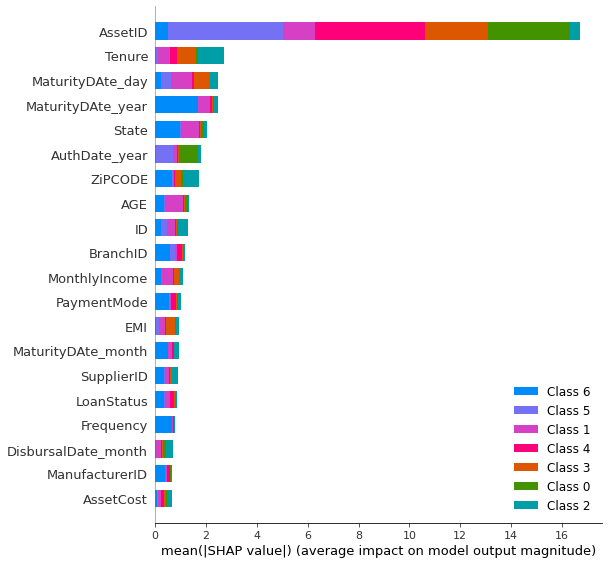

In [347]:
shap.summary_plot(shap_values, X_test.iloc[:20000,:])

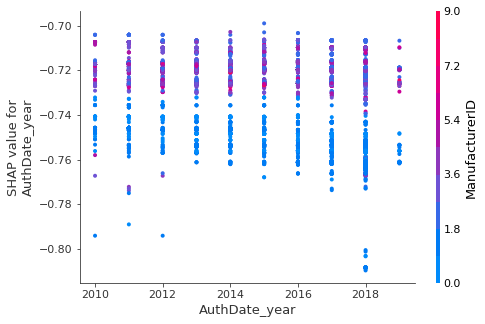

In [352]:
shap.dependence_plot("AuthDate_year", shap_values[0], X_test.iloc[:10000,:])

### Catboost 
#### For Handling Misclassification and Class distribution

In [234]:
import catboost
from catboost import CatBoostClassifier,Pool

In [319]:
train_pool=Pool(X_train_scaled,y_train)
test_pool=Pool(X_test_scaled,y_test)


### Parameter After Random Search CV


In [1]:
parameter={'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'Accuracy',
 'iterations': 2000,
 'leaf_estimation_method': 'Newton',
 
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 
 'devices': '0:1',
 
 'l2_leaf_reg': 9,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',

 'model_size_reg': 0.5,
 'use_best_model': False,
 'class_names': [0, 1, 2, 3, 4, 5, 6],
 'random_seed': 0,
 'depth': 9,
 'border_count': 128,

 'data_partition': 'DocParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'min_data_in_leaf': 1,

 'loss_function': 'MultiClass',
 'learning_rate': 0.15,
 'score_function': 'Cosine',
 'task_type': 'GPU',
 'leaf_estimation_iterations': 1,
 'bootstrap_type': 'Bayesian',
 'max_leaves': 512}

In [2]:
cboost=CatBoostClassifier(**parameter)

NameError: name 'CatBoostClassifier' is not defined

In [361]:
cboost.fit(X_train_scaled,y_train,plot=True,eval_set=test_pool)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4857085	test: 0.4857487	best: 0.4857487 (0)	total: 64.5ms	remaining: 1m 4s
1:	learn: 0.4987126	test: 0.4993760	best: 0.4993760 (1)	total: 120ms	remaining: 60s
2:	learn: 0.5018284	test: 0.5032434	best: 0.5032434 (2)	total: 172ms	remaining: 57.3s
3:	learn: 0.5123095	test: 0.5130300	best: 0.5130300 (3)	total: 226ms	remaining: 56.2s
4:	learn: 0.5183947	test: 0.5190401	best: 0.5190401 (4)	total: 282ms	remaining: 56s
5:	learn: 0.5233174	test: 0.5238396	best: 0.5238396 (5)	total: 335ms	remaining: 55.5s
6:	learn: 0.5270153	test: 0.5275250	best: 0.5275250 (6)	total: 383ms	remaining: 54.4s
7:	learn: 0.5329825	test: 0.5331280	best: 0.5331280 (7)	total: 433ms	remaining: 53.7s
8:	learn: 0.5368572	test: 0.5369794	best: 0.5369794 (8)	total: 484ms	remaining: 53.2s
9:	learn: 0.5389552	test: 0.5387042	best: 0.5387042 (9)	total: 535ms	remaining: 53s
10:	learn: 0.5407818	test: 0.5403005	best: 0.5403005 (10)	total: 582ms	remaining: 52.3s
11:	learn: 0.5440475	test: 0.5435038	best: 0.5435038 (11)

96:	learn: 0.6532513	test: 0.6420977	best: 0.6420977 (96)	total: 5.09s	remaining: 47.4s
97:	learn: 0.6544494	test: 0.6434904	best: 0.6434904 (97)	total: 5.15s	remaining: 47.4s
98:	learn: 0.6550208	test: 0.6439243	best: 0.6439243 (98)	total: 5.2s	remaining: 47.3s
99:	learn: 0.6569456	test: 0.6454562	best: 0.6454562 (99)	total: 5.26s	remaining: 47.3s
100:	learn: 0.6577241	test: 0.6464204	best: 0.6464204 (100)	total: 5.32s	remaining: 47.3s
101:	learn: 0.6588508	test: 0.6472829	best: 0.6472829 (101)	total: 5.37s	remaining: 47.3s
102:	learn: 0.6593204	test: 0.6477757	best: 0.6477757 (102)	total: 5.42s	remaining: 47.2s
103:	learn: 0.6618915	test: 0.6502986	best: 0.6502986 (103)	total: 5.48s	remaining: 47.2s
104:	learn: 0.6625772	test: 0.6510003	best: 0.6510003 (104)	total: 5.53s	remaining: 47.1s
105:	learn: 0.6636253	test: 0.6521413	best: 0.6521413 (105)	total: 5.58s	remaining: 47.1s
106:	learn: 0.6641556	test: 0.6523502	best: 0.6523502 (106)	total: 5.63s	remaining: 47s
107:	learn: 0.6655751

189:	learn: 0.7326079	test: 0.7133460	best: 0.7133460 (189)	total: 10.1s	remaining: 42.9s
190:	learn: 0.7337114	test: 0.7141763	best: 0.7141763 (190)	total: 10.1s	remaining: 42.9s
191:	learn: 0.7347149	test: 0.7150976	best: 0.7150976 (191)	total: 10.2s	remaining: 42.8s
192:	learn: 0.7353737	test: 0.7155154	best: 0.7155154 (192)	total: 10.2s	remaining: 42.8s
193:	learn: 0.7360451	test: 0.7164100	best: 0.7164100 (193)	total: 10.3s	remaining: 42.8s
194:	learn: 0.7365343	test: 0.7167796	best: 0.7167796 (194)	total: 10.3s	remaining: 42.7s
195:	learn: 0.7369986	test: 0.7172456	best: 0.7172456 (195)	total: 10.4s	remaining: 42.6s
196:	learn: 0.7373378	test: 0.7175456	best: 0.7175456 (196)	total: 10.4s	remaining: 42.6s
197:	learn: 0.7379681	test: 0.7181188	best: 0.7181188 (197)	total: 10.5s	remaining: 42.5s
198:	learn: 0.7390716	test: 0.7185901	best: 0.7185901 (198)	total: 10.6s	remaining: 42.5s
199:	learn: 0.7401590	test: 0.7194847	best: 0.7194847 (199)	total: 10.6s	remaining: 42.4s
200:	learn

281:	learn: 0.7942163	test: 0.7681817	best: 0.7681817 (281)	total: 15.1s	remaining: 38.4s
282:	learn: 0.7951198	test: 0.7690923	best: 0.7690923 (282)	total: 15.2s	remaining: 38.4s
283:	learn: 0.7957233	test: 0.7696226	best: 0.7696226 (283)	total: 15.2s	remaining: 38.4s
284:	learn: 0.7963071	test: 0.7702386	best: 0.7702386 (284)	total: 15.3s	remaining: 38.3s
285:	learn: 0.7968696	test: 0.7708493	best: 0.7708493 (285)	total: 15.3s	remaining: 38.3s
286:	learn: 0.7975213	test: 0.7713957	best: 0.7713957 (286)	total: 15.4s	remaining: 38.2s
287:	learn: 0.7981605	test: 0.7719045	best: 0.7719045 (287)	total: 15.4s	remaining: 38.2s
288:	learn: 0.7986123	test: 0.7722849	best: 0.7722849 (288)	total: 15.5s	remaining: 38.1s
289:	learn: 0.7990997	test: 0.7727295	best: 0.7727295 (289)	total: 15.6s	remaining: 38.1s
290:	learn: 0.7996390	test: 0.7732276	best: 0.7732276 (290)	total: 15.6s	remaining: 38s
291:	learn: 0.8004514	test: 0.7739454	best: 0.7739454 (291)	total: 15.7s	remaining: 38s
292:	learn: 0.

375:	learn: 0.8420206	test: 0.8109757	best: 0.8109757 (375)	total: 20.3s	remaining: 33.7s
376:	learn: 0.8423081	test: 0.8112703	best: 0.8112703 (376)	total: 20.4s	remaining: 33.7s
377:	learn: 0.8426973	test: 0.8115328	best: 0.8115328 (377)	total: 20.4s	remaining: 33.6s
378:	learn: 0.8430741	test: 0.8118703	best: 0.8118703 (378)	total: 20.5s	remaining: 33.6s
379:	learn: 0.8435847	test: 0.8123791	best: 0.8123791 (379)	total: 20.5s	remaining: 33.5s
380:	learn: 0.8437901	test: 0.8125827	best: 0.8125827 (380)	total: 20.6s	remaining: 33.5s
381:	learn: 0.8440597	test: 0.8128291	best: 0.8128291 (381)	total: 20.6s	remaining: 33.4s
382:	learn: 0.8443989	test: 0.8129523	best: 0.8129523 (382)	total: 20.7s	remaining: 33.3s
383:	learn: 0.8447918	test: 0.8135040	best: 0.8135040 (383)	total: 20.8s	remaining: 33.3s
384:	learn: 0.8450114	test: 0.8137665	best: 0.8137665 (384)	total: 20.8s	remaining: 33.2s
385:	learn: 0.8455667	test: 0.8142915	best: 0.8142915 (385)	total: 20.9s	remaining: 33.2s
386:	learn

470:	learn: 0.8735104	test: 0.8401157	best: 0.8401157 (470)	total: 25.5s	remaining: 28.6s
471:	learn: 0.8734801	test: 0.8401478	best: 0.8401478 (471)	total: 25.5s	remaining: 28.6s
472:	learn: 0.8738550	test: 0.8404746	best: 0.8404746 (472)	total: 25.6s	remaining: 28.5s
473:	learn: 0.8742068	test: 0.8408710	best: 0.8408710 (473)	total: 25.7s	remaining: 28.5s
474:	learn: 0.8745782	test: 0.8412245	best: 0.8412245 (474)	total: 25.7s	remaining: 28.4s
475:	learn: 0.8748371	test: 0.8415834	best: 0.8415834 (475)	total: 25.8s	remaining: 28.4s
476:	learn: 0.8749531	test: 0.8415459	best: 0.8415834 (475)	total: 25.8s	remaining: 28.3s
477:	learn: 0.8752388	test: 0.8418834	best: 0.8418834 (477)	total: 25.9s	remaining: 28.2s
478:	learn: 0.8756959	test: 0.8422530	best: 0.8422530 (478)	total: 25.9s	remaining: 28.2s
479:	learn: 0.8759870	test: 0.8425958	best: 0.8425958 (479)	total: 26s	remaining: 28.1s
480:	learn: 0.8762387	test: 0.8428851	best: 0.8428851 (480)	total: 26s	remaining: 28.1s
481:	learn: 0.

562:	learn: 0.8963725	test: 0.8623135	best: 0.8623135 (562)	total: 30.6s	remaining: 23.8s
563:	learn: 0.8965064	test: 0.8623617	best: 0.8623617 (563)	total: 30.7s	remaining: 23.7s
564:	learn: 0.8967046	test: 0.8624046	best: 0.8624046 (564)	total: 30.8s	remaining: 23.7s
565:	learn: 0.8969421	test: 0.8625653	best: 0.8625653 (565)	total: 30.8s	remaining: 23.6s
566:	learn: 0.8972974	test: 0.8629242	best: 0.8629242 (566)	total: 30.9s	remaining: 23.6s
567:	learn: 0.8974563	test: 0.8630902	best: 0.8630902 (567)	total: 30.9s	remaining: 23.5s
568:	learn: 0.8977849	test: 0.8633366	best: 0.8633366 (568)	total: 31s	remaining: 23.5s
569:	learn: 0.8981438	test: 0.8635777	best: 0.8635777 (569)	total: 31s	remaining: 23.4s
570:	learn: 0.8983652	test: 0.8637223	best: 0.8637223 (570)	total: 31.1s	remaining: 23.4s
571:	learn: 0.8986116	test: 0.8638723	best: 0.8638723 (571)	total: 31.1s	remaining: 23.3s
572:	learn: 0.8991097	test: 0.8645579	best: 0.8645579 (572)	total: 31.2s	remaining: 23.3s
573:	learn: 0.

657:	learn: 0.9145600	test: 0.8790904	best: 0.8790904 (657)	total: 35.9s	remaining: 18.7s
658:	learn: 0.9146529	test: 0.8791654	best: 0.8791654 (658)	total: 35.9s	remaining: 18.6s
659:	learn: 0.9147779	test: 0.8793261	best: 0.8793261 (659)	total: 36s	remaining: 18.5s
660:	learn: 0.9150760	test: 0.8797975	best: 0.8797975 (660)	total: 36.1s	remaining: 18.5s
661:	learn: 0.9153082	test: 0.8798511	best: 0.8798511 (661)	total: 36.1s	remaining: 18.4s
662:	learn: 0.9154242	test: 0.8797868	best: 0.8798511 (661)	total: 36.2s	remaining: 18.4s
663:	learn: 0.9156153	test: 0.8799421	best: 0.8799421 (663)	total: 36.2s	remaining: 18.3s
664:	learn: 0.9157242	test: 0.8801136	best: 0.8801136 (664)	total: 36.3s	remaining: 18.3s
665:	learn: 0.9158938	test: 0.8803064	best: 0.8803064 (665)	total: 36.4s	remaining: 18.2s
666:	learn: 0.9161884	test: 0.8806171	best: 0.8806171 (666)	total: 36.4s	remaining: 18.2s
667:	learn: 0.9164259	test: 0.8807724	best: 0.8807724 (667)	total: 36.5s	remaining: 18.1s
668:	learn: 

749:	learn: 0.9273159	test: 0.8913464	best: 0.8913464 (749)	total: 40.9s	remaining: 13.6s
750:	learn: 0.9275391	test: 0.8915607	best: 0.8915607 (750)	total: 41s	remaining: 13.6s
751:	learn: 0.9277195	test: 0.8915821	best: 0.8915821 (751)	total: 41s	remaining: 13.5s
752:	learn: 0.9277713	test: 0.8916142	best: 0.8916142 (752)	total: 41.1s	remaining: 13.5s
753:	learn: 0.9278552	test: 0.8916410	best: 0.8916410 (753)	total: 41.1s	remaining: 13.4s
754:	learn: 0.9280266	test: 0.8919088	best: 0.8919088 (754)	total: 41.2s	remaining: 13.4s
755:	learn: 0.9283123	test: 0.8920802	best: 0.8920802 (755)	total: 41.3s	remaining: 13.3s
756:	learn: 0.9285158	test: 0.8920910	best: 0.8920910 (756)	total: 41.3s	remaining: 13.3s
757:	learn: 0.9287140	test: 0.8922945	best: 0.8922945 (757)	total: 41.4s	remaining: 13.2s
758:	learn: 0.9287587	test: 0.8923695	best: 0.8923695 (758)	total: 41.4s	remaining: 13.2s
759:	learn: 0.9287319	test: 0.8924338	best: 0.8924338 (759)	total: 41.5s	remaining: 13.1s
760:	learn: 0.

841:	learn: 0.9379774	test: 0.9009294	best: 0.9009294 (841)	total: 46s	remaining: 8.62s
842:	learn: 0.9379881	test: 0.9008919	best: 0.9009294 (841)	total: 46s	remaining: 8.57s
843:	learn: 0.9381685	test: 0.9009829	best: 0.9009829 (843)	total: 46.1s	remaining: 8.51s
844:	learn: 0.9381827	test: 0.9010901	best: 0.9010901 (844)	total: 46.1s	remaining: 8.46s
845:	learn: 0.9382095	test: 0.9011972	best: 0.9011972 (845)	total: 46.2s	remaining: 8.4s
846:	learn: 0.9382935	test: 0.9012508	best: 0.9012508 (846)	total: 46.2s	remaining: 8.35s
847:	learn: 0.9384309	test: 0.9014811	best: 0.9014811 (847)	total: 46.3s	remaining: 8.3s
848:	learn: 0.9385077	test: 0.9014222	best: 0.9014811 (847)	total: 46.3s	remaining: 8.24s
849:	learn: 0.9386452	test: 0.9015293	best: 0.9015293 (849)	total: 46.4s	remaining: 8.19s
850:	learn: 0.9388452	test: 0.9017704	best: 0.9017704 (850)	total: 46.5s	remaining: 8.13s
851:	learn: 0.9390309	test: 0.9019364	best: 0.9019364 (851)	total: 46.5s	remaining: 8.08s
852:	learn: 0.93

935:	learn: 0.9467855	test: 0.9099499	best: 0.9099499 (935)	total: 51.2s	remaining: 3.5s
936:	learn: 0.9468766	test: 0.9100624	best: 0.9100624 (936)	total: 51.2s	remaining: 3.44s
937:	learn: 0.9469533	test: 0.9101213	best: 0.9101213 (937)	total: 51.3s	remaining: 3.39s
938:	learn: 0.9469783	test: 0.9101749	best: 0.9101749 (938)	total: 51.3s	remaining: 3.33s
939:	learn: 0.9470533	test: 0.9102445	best: 0.9102445 (939)	total: 51.4s	remaining: 3.28s
940:	learn: 0.9472265	test: 0.9103088	best: 0.9103088 (940)	total: 51.4s	remaining: 3.23s
941:	learn: 0.9473890	test: 0.9104106	best: 0.9104106 (941)	total: 51.5s	remaining: 3.17s
942:	learn: 0.9475158	test: 0.9105445	best: 0.9105445 (942)	total: 51.6s	remaining: 3.12s
943:	learn: 0.9475729	test: 0.9106356	best: 0.9106356 (943)	total: 51.6s	remaining: 3.06s
944:	learn: 0.9476033	test: 0.9106034	best: 0.9106356 (943)	total: 51.6s	remaining: 3.01s
945:	learn: 0.9477622	test: 0.9106141	best: 0.9106356 (943)	total: 51.7s	remaining: 2.95s
946:	learn:

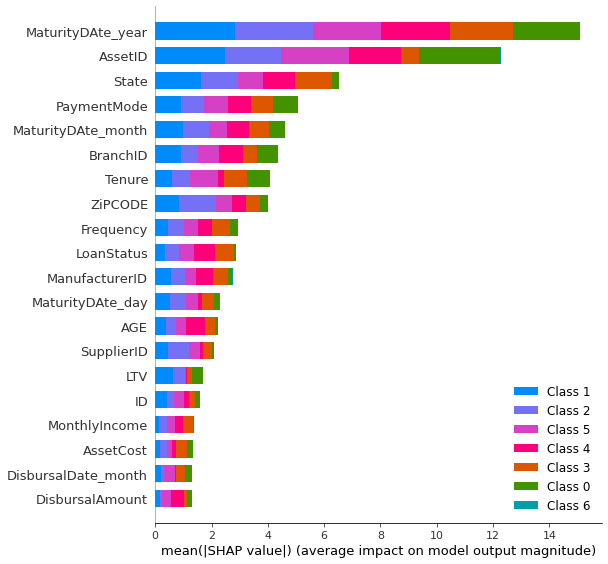

In [362]:
explainer = shap.TreeExplainer(cboost)
shap_values=explainer.shap_values(X_test.iloc[:20000,:])
shap.summary_plot(shap_values,X_test.iloc[:20000,:])

In [363]:
y_pred=cboost.predict(test_pool)

In [364]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     26815
           1       0.98      0.99      0.98     26699
           2       0.94      0.95      0.95     26656
           3       0.92      0.92      0.92     26716
           4       0.93      0.92      0.92     26651
           5       0.90      0.91      0.90     26567
           6       0.89      0.80      0.84     26581

    accuracy                           0.91    186685
   macro avg       0.92      0.91      0.91    186685
weighted avg       0.91      0.91      0.91    186685



In [371]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test , y_pred))

[[24495    58    16    13    42   795  1396]
 [   65 26389    71    58    30    21    65]
 [  229   154 25427   313   163   185   185]
 [  358   119   557 24639   436   301   306]
 [  429    50   210   604 24530   555   273]
 [ 1016    46    57   327   638 24085   398]
 [ 2180   229   619   924   593   820 21216]]


In [372]:
from sklearn.metrics import (accuracy_score , f1_score , precision_score , recall_score)
print("Accuracy:",accuracy_score(y_test , y_pred))
print("Precision:",precision_score(y_test,y_pred,average='macro'))
print("Recall:",recall_score(y_test,y_pred,average='macro'))
print("F1-score:",f1_score(y_test,y_pred,average='macro'))

Accuracy: 0.9148083670353805
Precision: 0.915002195452176
Recall: 0.9147394851047814
F1-score: 0.9143427129706571


### Training on Test Data
#### Prelimenary verification step's <br>
Check NAN values <br>
Remove 'Area','City','AssetID' that of Train data<br>


In [373]:
test_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,...,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,...,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,...,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,...,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,...,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,Monthly,Arrear,Closed,PDC,143,NEW DELHI BARAKHAMBHA ROAD,35,530016,419616.0,...,4276747,1046.0,22094,79.17,NaN,NaN,NaN,GURGAON,HARYANA,122001.0
14741,143397,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,...,4746586,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14742,143398,Monthly,Arrear,Closed,PDC,32,BANGALORE LALBAGH,36,595000,446500.0,...,4746588,2721.0,61196,75.04,NaN,NaN,NaN,BANGALORE,KARNATAKA,560020.0
14743,143399,Monthly,Arrear,Closed,PDC_E,246,BIKANER,12,400000,280000.0,...,11719081,1046.0,63565,70.00,M,NaN,NaN,GANGANAGAR,RAJASTHAN,335001.0


In [374]:
test_df.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Area               546
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         0
AuthDate             0
AssetID              0
ManufacturerID       2
SupplierID           0
LTV                  0
SEX                  5
AGE                  7
MonthlyIncome       14
City                 0
State                0
ZiPCODE              1
dtype: int64

In [375]:
test_df['SEX']=test_df['SEX'].fillna(test_df['SEX'].mode()[0])
test_df['AGE']=test_df['AGE'].fillna(test_df['AGE'].mean())
test_df['AGE'] = test_df['AGE'].astype(int)
test_df['MonthlyIncome']=test_df['MonthlyIncome'].fillna(0)

test_df['ManufacturerID']=test_df['ManufacturerID'].fillna(0)
test_df['MaturityDAte_day'] = test_df['MaturityDAte'].dt.day
test_df['MaturityDAte_month'] = test_df['MaturityDAte'].dt.month
test_df['MaturityDAte_year'] = test_df['MaturityDAte'].dt.year
test_df['AuthDate_day'] = test_df['AuthDate'].dt.day
test_df['AuthDate_month'] = test_df['AuthDate'].dt.month
test_df['AuthDate_year'] = test_df['AuthDate'].dt.year
test_df['DisbursalDate_day'] = test_df['DisbursalDate'].dt.day
test_df['DisbursalDate_month'] = test_df['DisbursalDate'].dt.month
test_df['DisbursalDate_year'] = test_df['DisbursalDate'].dt.year
test_df.drop(['MaturityDAte','AuthDate','DisbursalDate'], axis=1, inplace=True)

In [376]:
test_df['ZiPCODE'] = test_df['ZiPCODE'].astype(str)
test_df['ZiPCODE'] = LE.fit_transform(test_df['ZiPCODE'])
test_df['State'] = LE.fit_transform(test_df['State'])

test_df['PaymentMode'] = LE.fit_transform(test_df['PaymentMode'])


test_df['ManufacturerID'].fillna(0, inplace=True)
test_df['ManufacturerID'] = test_df['ManufacturerID'].astype(str)
test_df['ManufacturerID'] = LE.fit_transform(test_df['ManufacturerID'])
test_df['SupplierID'] = test_df['SupplierID'].astype(str)
test_df['SupplierID'] = LE.fit_transform(test_df['SupplierID'])

In [377]:
test_df.SEX=test_df.SEX.map({'M':1,'F':0}).astype(np.int)
test_df['Frequency'] = test_df['Frequency'].map({'Monthly':0, 'Quatrly':1, 'Half Yearly':2, 'BI-Monthly':3})
test_df.InstlmentMode=test_df.InstlmentMode.map({'Advance':1,'Arrear':0}).astype(np.int)
test_df.LoanStatus=test_df.LoanStatus.map({'Closed':1,'Active':0}).astype(np.int)


In [378]:
test_df['Frequency']

0        0
1        0
2        1
3        2
4        1
        ..
14740    0
14741    0
14742    0
14743    0
14744    0
Name: Frequency, Length: 14745, dtype: int64

In [379]:
test_df.drop(['Area','City'],axis=1,inplace=True)

In [380]:
test_df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,...,ZiPCODE,MaturityDAte_day,MaturityDAte_month,MaturityDAte_year,AuthDate_day,AuthDate_month,AuthDate_year,DisbursalDate_day,DisbursalDate_month,DisbursalDate_year
0,4,0,1,1,8,2,46,480000,365000.0,365000.0,...,1436,5,10,2015,29,12,2011,29,12,2011
1,5,0,1,1,6,2,45,480000,285000.0,285000.0,...,1436,1,1,2016,28,4,2012,28,4,2012
2,6,1,0,1,6,2,48,580000,400000.0,400000.0,...,1436,10,9,2017,22,10,2013,22,10,2013
3,25,2,0,1,1,154,36,725000,500000.0,500000.0,...,1564,10,2,2016,21,5,2013,21,5,2013
4,119,1,0,1,6,194,48,617000,400000.0,400000.0,...,2019,5,12,2016,30,11,2012,30,11,2012


In [381]:
test_df.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                    0
AGE                    0
MonthlyIncome          0
State                  0
ZiPCODE                0
MaturityDAte_day       0
MaturityDAte_month     0
MaturityDAte_year      0
AuthDate_day           0
AuthDate_month         0
AuthDate_year          0
DisbursalDate_day      0
DisbursalDate_month    0
DisbursalDate_year     0
dtype: int64

In [382]:
sc=RobustScaler()
test_data=sc.fit_transform(test_df)

In [383]:
test_df

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,...,ZiPCODE,MaturityDAte_day,MaturityDAte_month,MaturityDAte_year,AuthDate_day,AuthDate_month,AuthDate_year,DisbursalDate_day,DisbursalDate_month,DisbursalDate_year
0,4,0,1,1,8,2,46,480000,365000.0,365000.0,...,1436,5,10,2015,29,12,2011,29,12,2011
1,5,0,1,1,6,2,45,480000,285000.0,285000.0,...,1436,1,1,2016,28,4,2012,28,4,2012
2,6,1,0,1,6,2,48,580000,400000.0,400000.0,...,1436,10,9,2017,22,10,2013,22,10,2013
3,25,2,0,1,1,154,36,725000,500000.0,500000.0,...,1564,10,2,2016,21,5,2013,21,5,2013
4,119,1,0,1,6,194,48,617000,400000.0,400000.0,...,2019,5,12,2016,30,11,2012,30,11,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,143396,0,0,1,6,143,35,530016,419616.0,419616.0,...,4,10,2,2015,29,2,2012,29,2,2012
14741,143397,0,0,1,6,32,36,595000,446500.0,446500.0,...,1820,5,4,2015,10,4,2012,10,4,2012
14742,143398,0,0,1,6,32,36,595000,446500.0,446500.0,...,1820,5,4,2015,10,4,2012,10,4,2012
14743,143399,0,0,1,8,246,12,400000,280000.0,280000.0,...,662,10,8,2014,26,7,2013,25,7,2013


In [384]:
y_pred_test=cboost.predict(test_data)

In [386]:
label_encoder={' > 48 Months':0, '12-18 Months':1, '18-24 Months':2, '24-30 Months':3, '30-36 Months':4, '36-48 Months':5, 'No Top-up Service':6}

In [387]:
labels=y_pred_test.flatten()
test_df['Top-up Month']=LE_target.inverse_transform(labels)


In [388]:
test_df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,...,MaturityDAte_day,MaturityDAte_month,MaturityDAte_year,AuthDate_day,AuthDate_month,AuthDate_year,DisbursalDate_day,DisbursalDate_month,DisbursalDate_year,Top-up Month
0,4,0,1,1,8,2,46,480000,365000.0,365000.0,...,5,10,2015,29,12,2011,29,12,2011,> 48 Months
1,5,0,1,1,6,2,45,480000,285000.0,285000.0,...,1,1,2016,28,4,2012,28,4,2012,> 48 Months
2,6,1,0,1,6,2,48,580000,400000.0,400000.0,...,10,9,2017,22,10,2013,22,10,2013,36-48 Months
3,25,2,0,1,1,154,36,725000,500000.0,500000.0,...,10,2,2016,21,5,2013,21,5,2013,12-18 Months
4,119,1,0,1,6,194,48,617000,400000.0,400000.0,...,5,12,2016,30,11,2012,30,11,2012,> 48 Months


In [389]:
CatBoost=pd.DataFrame(test_df,columns=['ID','Top-up Month'])

In [390]:
CatBoost.to_csv('Catboost.csv')